# expected volume M83K

/Users/PallaviMaladkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in log10


Text(0, 0.5, 'DEC delta theta (degrees)')

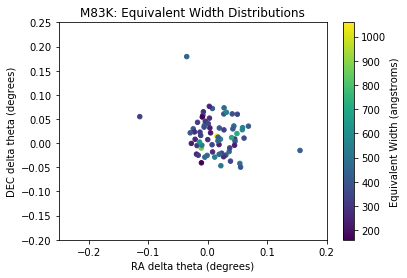

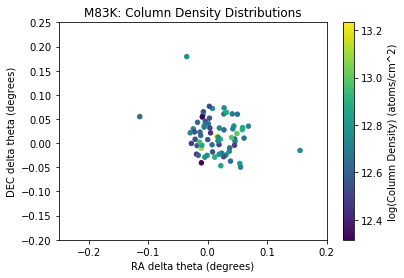

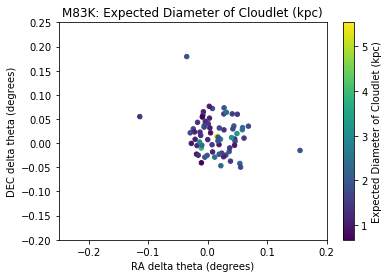

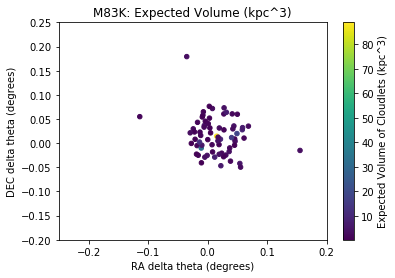

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
#provides access to fits (flexible image transport system) files
from matplotlib.pyplot import cm 
from astropy.wcs import WCS
from astropy.table import Table
#transformation from the real position of an object on the celestial sphere to the position on a cartesian plane
%matplotlib inline

tab=fits.open('SCIENCE_RBNSPECTRA.fits');
info= tab[1].data
#the info variable now contains the position and naming information
#info.columns - assigning the information in the columns to variables
ra=info['RA']
dec=info['DEC']
names=info['object']

#naming variables
vel='M83K'
#vmin=-90
#vmax=40

#EWrange=np.str(vmin)+'_'+np.str(vmax)

x1 = np.mean(ra)
y1 = np.mean(dec)

#calculating the exact angular separation between points on celestial sphere
#convert all arcsecond measurements to radians
raRad = ra*(np.pi/(180.))
decRad = dec*(np.pi/(180.))
x1Rad = x1*(np.pi/(180.))
y1Rad = y1*(np.pi/(180.))
#listyRad=np.array(listy)*(np.pi/(180.*3600.)) #make listy an array to be able to convert to radians
'''
#calculating the exact angular separation using formula
angles = []
for i in range(0,126):
    #angular separation formula
    thetaRad = (np.sin(y1Rad)*np.sin(decRad[i])+np.cos(y1Rad)*np.cos(decRad[i])*np.cos(x1Rad-raRad[i]))
    angles.append(thetaRad) #angles now contains the angular separation in radians

listy=np.array(listy)
angles=np.array(angles)
angles_arcsec=np.rad2deg(angles)*3600. #angles_arcsec contains angular separation in arcseconds
'''

A = np.arccos(np.sin(y1Rad)*np.sin(y1Rad)+np.cos(y1Rad)*np.cos(y1Rad)*np.cos(x1Rad-np.array(raRad)))
B = np.arccos(np.sin(y1Rad)*np.sin(np.array(decRad))+np.cos(y1Rad)*np.cos(np.array(decRad))*np.cos(x1Rad-x1Rad))

for i in range(0,126):
    if x1Rad>raRad[i]:
        A[i]=-A[i]
    if y1Rad>decRad[i]:
        B[i]=-B[i]

path = '/Users/PallaviMaladkar/Documents/Research/Flames_M83/'+np.str(vel)+'/'
EWtable=Table.read(vel+'_EWtable.txt',format='ascii')
        
Adeg = np.array(A)*(180./np.pi)
Bdeg = np.array(B)*(180./np.pi)
EWval = np.array(EWtable['ew_tot'])
col = np.array(EWtable['col'])
logCol = np.log10(col)
density = 0.01 #(atoms/cm^3)
radius = col/(2*density)*1e5
radius_kpc = radius*3.24078e-20
diameter = radius*2
diameter_kpc = radius_kpc*2
volume = (4/3)*np.pi*radius**3
volume_kpc = (4/3)*np.pi*radius_kpc**3

for i in range(0,126):
    
    #vmin=EWtable['vmin'][i]
    #vmax=EWtable['vmax'][i]

    #EWrange=np.str(vmin)+'_'+np.str(vmax)
    
    #taking out sky readings
    if "Sky" in (np.str(EWtable['names'][i])):
        #plt.plot(Adeg[i], Bdeg[i], 'ro', markersize=12, markerfacecolor='none', lw=.5)
        Adeg[i] = np.NaN
        Bdeg[i] = np.NaN
        EWval[i] = np.NaN
        col[i] = np.NaN
        logCol[i] = np.NaN
        radius[i] = np.NaN
        radius_kpc[i] = np.NaN
        diameter[i] = np.NaN
        diameter_kpc[i] = np.NaN
        volume[i] = np.NaN
        volume_kpc[i] = np.NaN
    
    #taking out non-readings by checking statistical significance
    if ((EWtable['ew_tot'][i]) < (3*EWtable['err_ew_tot'][i])):
        #EWval[i]=0
        
        Adeg[i] = np.NaN
        Bdeg[i] = np.NaN
        EWval[i] = np.NaN
        col[i] = np.NaN
        logCol[i] = np.NaN
        radius[i] = np.NaN
        radius_kpc[i] = np.NaN
        diameter[i] = np.NaN
        diameter_kpc[i] = np.NaN
        volume[i] = np.NaN
        volume_kpc[i] = np.NaN
        
        #EWval[i]=2*EWtable['err_ew_tot'][i]
        
        #plt.plot(Adeg[i],Bdeg[i],'ro',markersize=12,markerfacecolor='none',lw=.5)

#plotting
fig1 = plt.figure()

plt.scatter(Adeg, Bdeg, 20 ,c=1000*(EWval))#,vmin=0.1,vmax=.3) #, label='Exact') 
#plt.scatter(Adeg, Bdeg, 20 ,c=1000*(EW10-EWval))#,vmin=0.1,vmax=.3) #, label='Exact') 
plt.colorbar(label="Equivalent Width (angstroms)")
#plt.plot(RAlist,DEClist,'rd', label='Approximation')
#plt.legend()
plt.xlim([-0.25,0.2])
plt.ylim([-0.2,0.25])

plt.title(vel+': Equivalent Width Distributions')
plt.xlabel('RA delta theta (degrees)')
plt.ylabel('DEC delta theta (degrees)')

#fig1.savefig(path+'EWvisualization.png')

fig2 = plt.figure()

plt.scatter(Adeg, Bdeg, 20 ,c=logCol)#,vmin=0.1,vmax=.3) #, label='Exact') 
#plt.scatter(Adeg, Bdeg, 20 ,c=1000*(EW10-EWval))#,vmin=0.1,vmax=.3) #, label='Exact') 
plt.colorbar(label="log(Column Density) (atoms/cm^2)")
#plt.plot(RAlist,DEClist,'rd', label='Approximation')
#plt.legend()
plt.xlim([-0.25,0.2])
plt.ylim([-0.2,0.25])

plt.title(vel+': Column Density Distributions')
plt.xlabel('RA delta theta (degrees)')
plt.ylabel('DEC delta theta (degrees)')

#fig2.savefig(path+'ColumnDensityVisualization.png')

fig3 = plt.figure()

plt.scatter(Adeg, Bdeg, 20, c=diameter_kpc)
plt.colorbar(label="Expected Diameter of Cloudlet (kpc)")
plt.xlim([-0.25,0.2])
plt.ylim([-0.2,0.25])

plt.title(vel+': Expected Diameter of Cloudlet (kpc)')
plt.xlabel('RA delta theta (degrees)')
plt.ylabel('DEC delta theta (degrees)')

fig4 = plt.figure()

plt.scatter(Adeg, Bdeg, 20, c=volume_kpc)
plt.colorbar(label="Expected Volume of Cloudlets (kpc^3)")
plt.xlim([-0.25,0.2])
plt.ylim([-0.2,0.25])

plt.title(vel+': Expected Volume (kpc^3)')
plt.xlabel('RA delta theta (degrees)')
plt.ylabel('DEC delta theta (degrees)')

# varying impact parameter

[2, 3, 5, 7, 9, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 41, 42, 43, 45, 46, 49, 50, 51, 53, 54, 55, 57, 58, 63, 68, 69, 74, 77, 80, 82, 84, 85, 86, 87, 88, 92, 95, 99, 100, 106, 111, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124]


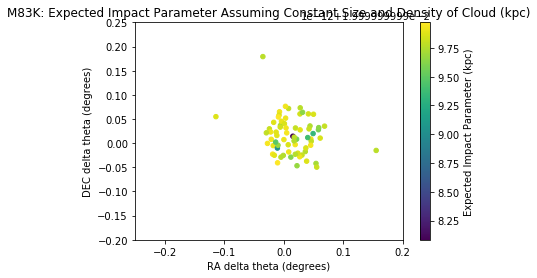

In [3]:
constant_radius_kpc = 0.02
d_kpc = np.sqrt(constant_radius_kpc**2-((col/(2*density))*3.24078e-22)**2)

"""
- we maintain a constant radius of the clouds
- we calculate the expected impact parameter of where the sightline passes through
- because N/n_o gives a length in cm, we multiply by 3.24078e-22 to get it to kpc
- eqaution derived from the model from Dr. Bordoloi
"""

fig4 = plt.figure()

plt.scatter(Adeg, Bdeg, 20, c=(d_kpc))
plt.colorbar(label="Expected Impact Parameter (kpc)")
plt.xlim([-0.25,0.2])
plt.ylim([-0.2,0.25])

plt.title(vel+': Expected Impact Parameter Assuming Constant Size and Density of Cloud (kpc)')
plt.xlabel('RA delta theta (degrees)')
plt.ylabel('DEC delta theta (degrees)')

'''
this shows us that most of the sightlines are expected to pass through larger impact parameters
of the cloud in order to return the expected column densities. further from the center of the
spherical cloud, the sightline passes through much less gas. basically the inverse of the
diameter graph. 
'''

strongsignal=[]

for i in range(len(volume_kpc)):
    if volume_kpc[i] > 0.00008:
        strongsignal.append(i)

print(strongsignal)

#the super strong signal in the middle is object 22

In [22]:
print(np.max([el for el in volume_kpc if el < 1]), np.min([el for el in volume_kpc if el < 1]))

0.959041241900747 0.1577597238005929


# sizes

Text(0, 0.5, 'DEC delta theta (degrees)')

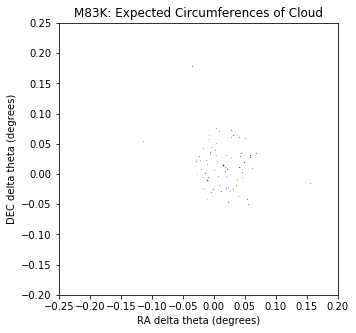

In [2]:
fig5 = plt.figure(figsize=(5,5))
D_kpc = 4663.4071715

marker = np.arctan(np.array(diameter_kpc)/D_kpc)*230/0.45

for i in range(len(Adeg)):
    
    plt.plot(Adeg[i], Bdeg[i], 'bo', markersize=marker[i], markerfacecolor='none')
    #diameter_kpc[i]*230/0.45
    #diameter_kpc[i]*5e2

#plt.colorbar(label="Expected Impact Parameter (kpc)")
plt.xlim([-0.25,0.2])
plt.ylim([-0.2,0.25])

plt.title(vel+': Expected Circumferences of Cloud')
plt.xlabel('RA delta theta (degrees)')
plt.ylabel('DEC delta theta (degrees)')

In [5]:
print(diameter_kpc)

[       nan        nan 1.07790094 1.44788775        nan 0.67039768
        nan 2.18165787        nan 1.72385578        nan        nan
        nan        nan 1.80890072 1.04961177 1.22352511        nan
 1.58107195 1.14082612 1.90255708 1.56408064 5.5372393  1.75052757
 2.38579825        nan 1.47308181 1.92299381 1.04091029 2.61665587
 1.7559534  2.00113306        nan 1.73279444 2.37779356 2.58464115
 1.46651176 1.35936451 1.86408932        nan        nan 1.88213712
 1.09753395 1.78548092        nan 1.50534906 3.11259358        nan
        nan 3.26333789 1.02035134 1.96356522        nan 1.47798411
 1.46361516 1.73114782        nan 1.98173122 0.98608144        nan
        nan        nan        nan 2.12956381        nan        nan
        nan        nan 1.7101452  1.44124051        nan        nan
        nan        nan 2.45371863        nan        nan 2.29370666
        nan        nan 1.11527756        nan 1.92337689        nan
 1.50658799 1.99678483 1.94423833 1.11473796 0.93403572       

# sizes MWK

/Users/PallaviMaladkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in log10


Text(0, 0.5, 'DEC delta theta (degrees)')

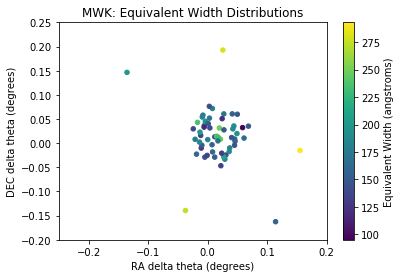

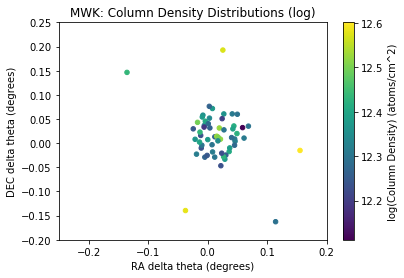

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
#provides access to fits (flexible image transport system) files
from matplotlib.pyplot import cm 
from astropy.wcs import WCS
from astropy.table import Table
#transformation from the real position of an object on the celestial sphere to the position on a cartesian plane
%matplotlib inline

tab=fits.open('SCIENCE_RBNSPECTRA.fits');
info= tab[1].data
#the info variable now contains the position and naming information
#info.columns - assigning the information in the columns to variables
ra=info['RA']
dec=info['DEC']
names=info['object']

#naming variables
vel='MWK'
vmin=-90
vmax=40

EWrange=np.str(vmin)+'_'+np.str(vmax)

x1 = np.mean(ra)
y1 = np.mean(dec)

#calculating the exact angular separation between points on celestial sphere
#convert all arcsecond measurements to radians
raRad = ra*(np.pi/(180.))
decRad = dec*(np.pi/(180.))
x1Rad = x1*(np.pi/(180.))
y1Rad = y1*(np.pi/(180.))
#listyRad=np.array(listy)*(np.pi/(180.*3600.)) #make listy an array to be able to convert to radians
'''
#calculating the exact angular separation using formula
angles = []
for i in range(0,126):
    #angular separation formula
    thetaRad = (np.sin(y1Rad)*np.sin(decRad[i])+np.cos(y1Rad)*np.cos(decRad[i])*np.cos(x1Rad-raRad[i]))
    angles.append(thetaRad) #angles now contains the angular separation in radians

listy=np.array(listy)
angles=np.array(angles)
angles_arcsec=np.rad2deg(angles)*3600. #angles_arcsec contains angular separation in arcseconds
'''

A = np.arccos(np.sin(y1Rad)*np.sin(y1Rad)+np.cos(y1Rad)*np.cos(y1Rad)*np.cos(x1Rad-np.array(raRad)))
B = np.arccos(np.sin(y1Rad)*np.sin(np.array(decRad))+np.cos(y1Rad)*np.cos(np.array(decRad))*np.cos(x1Rad-x1Rad))

for i in range(0,126):
    if x1Rad>raRad[i]:
        A[i]=-A[i]
    if y1Rad>decRad[i]:
        B[i]=-B[i]

path = '/Users/PallaviMaladkar/Documents/Research/Flames_M83/'+np.str(vel)+'/EWranges/'+np.str(EWrange)+'/'
EWtable=Table.read(path+'e'+np.str(vel)+'_EWtable_'+np.str(EWrange)+'.txt',format='ascii')
        
Adeg = np.array(A)*(180./np.pi)
Bdeg = np.array(B)*(180./np.pi)
EWval = np.array(EWtable['ew_tot'])
col = np.array(EWtable['col'])
logCol = np.log10(col)
density = 1 #(atoms/cm^3)
radius = col/(2*density)*1e5
radius_kpc = radius*3.24078e-20
diameter = radius*2
diameter_kpc = radius_kpc*2
volume = (4/3)*np.pi*radius**3
volume_kpc = (4/3)*np.pi*radius_kpc**3

fig1 = plt.figure()

for i in range(0,126):
    
    #taking out sky readings
    if "Sky" in (np.str(EWtable['names'][i])):
        #plt.plot(Adeg[i], Bdeg[i], 'ro', markersize=12, markerfacecolor='none', lw=.5)
        Adeg[i] = np.NaN
        Bdeg[i] = np.NaN
        EWval[i] = np.NaN
        col[i] = np.NaN
        logCol[i] = np.NaN
        radius[i] = np.NaN
        radius_kpc[i] = np.NaN
        diameter[i] = np.NaN
        diameter_kpc[i] = np.NaN
        volume[i] = np.NaN
        volume_kpc[i] = np.NaN
    
    #taking out non-readings by checking statistical significance
    if ((EWtable['ew_tot'][i]) < (3*EWtable['err_ew_tot'][i])):
        #EWval[i]=0
        
        Adeg[i] = np.NaN
        Bdeg[i] = np.NaN
        EWval[i] = np.NaN
        col[i] = np.NaN
        logCol[i] = np.NaN
        radius[i] = np.NaN
        radius_kpc[i] = np.NaN
        diameter[i] = np.NaN
        diameter_kpc[i] = np.NaN
        volume[i] = np.NaN
        volume_kpc[i] = np.NaN
        
        #EWval[i]=2*EWtable['err_ew_tot'][i]
        
        #plt.plot(Adeg[i],Bdeg[i],'ro',markersize=12,markerfacecolor='none',lw=.5)

#plotting
plt.scatter(Adeg, Bdeg, 20 ,c=1000*(EWval))#,vmin=0.1,vmax=.3) #, label='Exact') 
#plt.scatter(Adeg, Bdeg, 20 ,c=1000*(EW10-EWval))#,vmin=0.1,vmax=.3) #, label='Exact') 
plt.colorbar(label='Equivalent Width (angstroms)')
#plt.colorbar.set_ylabel('Equivalent Width (angstroms)', rotation=270)
#plt.colorbar.set_label('Equivalent Width (angstroms)', rotation=270)
#plt.plot(RAlist,DEClist,'rd', label='Approximation')
#plt.legend()
plt.xlim([-0.25,0.2])
plt.ylim([-0.2,0.25])

plt.title(vel+': Equivalent Width Distributions')
plt.xlabel('RA delta theta (degrees)')
plt.ylabel('DEC delta theta (degrees)')

#fig1.savefig(path+'EWvisualization.png')


fig2 = plt.figure()

#plotting
plt.scatter(Adeg, Bdeg, 20 ,c=logCol)#,vmin=0.1,vmax=.3) #, label='Exact') 
#plt.scatter(Adeg, Bdeg, 20 ,c=1000*(EW10-EWval))#,vmin=0.1,vmax=.3) #, label='Exact') 
plt.colorbar(label='log(Column Density) (atoms/cm^2)')

#plt.plot(RAlist,DEClist,'rd', label='Approximation')
#plt.legend()
plt.xlim([-0.25,0.2])
plt.ylim([-0.2,0.25])

plt.title(vel+ ': Column Density Distributions (log)')
plt.xlabel('RA delta theta (degrees)')
plt.ylabel('DEC delta theta (degrees)')

#fig2.savefig(path+'ColumnDensityVisualization.png')

Text(0, 0.5, 'DEC delta theta (degrees)')

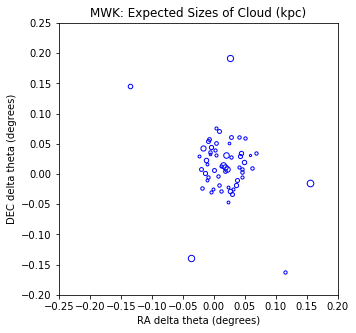

In [4]:
fig5 = plt.figure(figsize=(5,5))

for i in range(len(Adeg)):
    
    plt.plot(Adeg[i], Bdeg[i], 'bo', markersize=diameter_kpc[i]*230/0.45, markerfacecolor='none')
    #diameter_kpc[i]*5e2

#plt.colorbar(label="Expected Impact Parameter (kpc)")
plt.xlim([-0.25,0.2])
plt.ylim([-0.2,0.25])

plt.title(vel+': Expected Sizes of Cloud (kpc)')
plt.xlabel('RA delta theta (degrees)')
plt.ylabel('DEC delta theta (degrees)')

# CHI^2 calculation

In [27]:
#chi squared calculation
import numpy as np
import random
import matplotlib.pyplot as plt
from astropy.io import fits
#provides access to fits (flexible image transport system) files
from matplotlib.pyplot import cm 
from astropy.wcs import WCS
from astropy.table import Table
#transformation from the real position of an object on the celestial sphere to the position on a cartesian plane
%matplotlib inline

tab=fits.open('SCIENCE_RBNSPECTRA.fits');
info= tab[1].data
#the info variable now contains the position and naming information
#info.columns - assigning the information in the columns to variables
ra=info['RA']
dec=info['DEC']
names=info['object']

#naming variables
vel='M83K'
#vmin=-90
#vmax=40

#EWrange=np.str(vmin)+'_'+np.str(vmax)

x1 = np.mean(ra)
y1 = np.mean(dec)

#calculating the exact angular separation between points on celestial sphere
#convert all arcsecond measurements to radians
raRad = ra*(np.pi/(180.))
decRad = dec*(np.pi/(180.))
x1Rad = x1*(np.pi/(180.))
y1Rad = y1*(np.pi/(180.))
#listyRad=np.array(listy)*(np.pi/(180.*3600.)) #make listy an array to be able to convert to radians
'''
#calculating the exact angular separation using formula
angles = []
for i in range(0,126):
    #angular separation formula
    thetaRad = (np.sin(y1Rad)*np.sin(decRad[i])+np.cos(y1Rad)*np.cos(decRad[i])*np.cos(x1Rad-raRad[i]))
    angles.append(thetaRad) #angles now contains the angular separation in radians

listy=np.array(listy)
angles=np.array(angles)
angles_arcsec=np.rad2deg(angles)*3600. #angles_arcsec contains angular separation in arcseconds
'''

A = np.arccos(np.sin(y1Rad)*np.sin(y1Rad)+np.cos(y1Rad)*np.cos(y1Rad)*np.cos(x1Rad-np.array(raRad)))
B = np.arccos(np.sin(y1Rad)*np.sin(np.array(decRad))+np.cos(y1Rad)*np.cos(np.array(decRad))*np.cos(x1Rad-x1Rad))

for i in range(0,126):
    if x1Rad>raRad[i]:
        A[i]=-A[i]
    if y1Rad>decRad[i]:
        B[i]=-B[i]

path = '/Users/PallaviMaladkar/Documents/Research/Flames_M83/'+np.str(vel)+'/'
EWtable=Table.read(vel+'_EWtable.txt',format='ascii')
        
Adeg = np.array(A)*(180./np.pi)
Bdeg = np.array(B)*(180./np.pi)
EWval = np.array(EWtable['ew_tot'])
col = np.array(EWtable['col'])
logCol = np.log10(col)
# radius = col/(2*density)*1e5
# radius_kpc = radius*3.24078e-20
# diameter = radius*2
# diameter_kpc = radius_kpc*2
# volume = (4/3)*np.pi*radius**3
# volume_kpc = (4/3)*np.pi*radius_kpc**3

density = D #(atoms/cm^3)
density_kpc = density*((3.086e21)**3)
R = [radius]*126 #set max radius to 3 kpc
#set random impact parameters
np.random.seed(10)
impact_parameter = [np.random.uniform(0, radius, 126)]

N = (2*density_kpc*np.sqrt(np.square(np.array(R))-np.square(np.array(impact_parameter))))/((3.086e21)**2)
# print(N)
# print(col)

#chi squared test
diff = col - N
calculation = diff**2/N
chi2 = np.sum(calculation)
return(chi2)

/Users/PallaviMaladkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in log10


NameError: name 'D' is not defined

In [5]:
import modules as m
import pickle

from importlib import reload
reload(m)
m.chi2(1e-10,3)

/Users/PallaviMaladkar/Documents/Research/Flames_M83/modules.py:746: RuntimeWarning: invalid value encountered in log10
  logCol = np.log10(col)


1043714861797139.0

In [8]:
import modules as m
import pickle

from importlib import reload
reload(m)

print(m.chi2(1,1e-9))

330462419995546.6


/Users/PallaviMaladkar/Documents/Research/Flames_M83/modules.py:746: RuntimeWarning: invalid value encountered in log10
  logCol = np.log10(col)


In [31]:
c = -10
listy = []

for i in range(15):
    listy.append(m.chi2(1*10**c, 0.01))
    c+=1

print(listy)
print(np.min(listy))

[4.943923680376658e+17, 4.8728711804182376e+16, 4218630217004867.0, 330462419995546.6, 5570049257378922.0, 6.2378044111960344e+16, 6.308992053058492e+17, 6.316154938509545e+18, 6.316871668267299e+19, 6.316943345655202e+20, 6.316950513438112e+21, 6.316951230216844e+22, 6.316951301894722e+23, 6.31695130906251e+24, 6.31695130977929e+25]
330462419995546.6


In [35]:
#chi2(1e-10, 3) = 1043714861797139.0
#chi2(1e-7, 3) =   330462419995546.6
#chi2(1,1e-9) =    330462419995546.6

6.237804411196033e+16

In [33]:
c = -10
listy2 = []

for i in range(15):
    listy2.append(m.chi2(1, 1*10**c))
    c+=1

print(listy2)
print(np.min(listy2))

[4218630217004866.5, 330462419995546.6, 5570049257378922.0, 6.237804411196033e+16, 6.308992053058492e+17, 6.316154938509546e+18, 6.316871668267298e+19, 6.316943345655202e+20, 6.316950513438112e+21, 6.316951230216845e+22, 6.316951301894722e+23, 6.31695130906251e+24, 6.31695130977929e+25, 6.316951309850966e+26, 6.316951309858135e+27]
330462419995546.6


# creating chi2_table (with seeded impact parameter)

In [85]:
#nested loop to find the minimum chi^2 value

from astropy.table import Table
from astropy.io import fits
import numpy as np

tab=fits.open('SCIENCE_RBNSPECTRA.fits');
info= tab[1].data
ra=info['RA']
dec=info['DEC']
names=info['object']

chi2_table=Table()

chi2_table['density']=0*np.zeros(225)
chi2_table['maxradius']=0*np.zeros(225)
chi2_table['chi2']=0*np.zeros(225)

chi2_table.write('chi2_table.txt',format='ascii',overwrite=True)



x=-10
chi2list = []
index = 0

for i in range(15):
    
    y=-10
    densitylist = []
    for i in range(15):
        densitylist.append(1*10**y)
        y+=1
        chi2list.append(m.chi2(densitylist[i], 1*10**x))
        
        chi2_table['density'][index]=densitylist[i]
        chi2_table['maxradius'][index]=1*10**x
        chi2_table['chi2'][index]=m.chi2(densitylist[i], 1*10**x)
        chi2_table.write('chi2_table.txt',format='ascii',overwrite=True)
        
        index+=1
        
        if m.chi2(densitylist[i],1*10**x) == 330462419995546.5:
            print("density = " + np.str(densitylist[i]))
            print("maxradius = " + np.str(1*10**x))
    x+=1

# print(chi2list)





# for i in range(15):
    
#     y=-10
#     densitylist = []
#     for i in range(15):
#         densitylist.append(1*10**y)
#         y+=1
    
#     chi2list.append(m.chi2(density[i], 1*10**x))
#     x+=1

/Users/PallaviMaladkar/Documents/Research/Flames_M83/modules.py:746: RuntimeWarning: invalid value encountered in log10
  logCol = np.log10(col)


density = 1e-08
maxradius = 0.1


In [41]:
print(np.min(chi2list))

330462419995546.5


In [ ]:
### m.chi2(1e-8, 0.1)

In [46]:
len(chi2list)

225

In [106]:
from astropy.table import Table
T=Table.read('chi2_table.txt',format='ascii')
T.show_in_browser(jsviewer=True)

# comparing chi^2 with varying densities (constant radius)

Text(0, 0.5, 'log(chi2)')

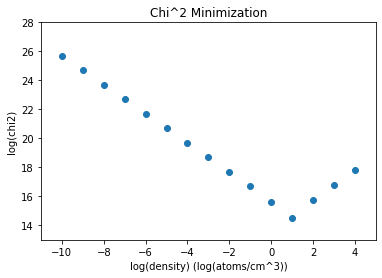

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
#provides access to fits (flexible image transport system) files
from matplotlib.pyplot import cm 
from astropy.wcs import WCS
from astropy.table import Table
#transformation from the real position of an object on the celestial sphere to the position on a cartesian plane
%matplotlib inline

path = "/Users/PallaviMaladkar/Documents/Research/Flames_M83/"
chi2_table = Table.read(path+'chi2_table.txt',format='ascii')

densities = chi2_table['density']
max_radii = chi2_table['maxradius']
chi2_vals = chi2_table['chi2']

densityneg10 = []
chi2neg10 = []

for i in range(len(densities)):
    if max_radii[i] == 1*10**-10:
        densityneg10.append(densities[i])
        chi2neg10.append(chi2_vals[i])
    #power+=1

fig1 = plt.figure()

plt.scatter(np.log10(densityneg10), np.log10(chi2neg10))#,vmin=0.1,vmax=.3) #, label='Exact') 
#plt.scatter(Adeg, Bdeg, 20 ,c=1000*(EW10-EWval))#,vmin=0.1,vmax=.3) #, label='Exact') 
#plt.colorbar(label="Equivalent Width (angstroms)")
#plt.plot(RAlist,DEClist,'rd', label='Approximation')
#plt.legend()
plt.xlim([-11,5])
plt.ylim([13,28])

plt.title('Chi^2 Minimization')
plt.xlabel('log(density) (log(atoms/cm^3))')
plt.ylabel('log(chi2)')

# relationship between radius and density (seeded impact parameters)

Text(0, 0.5, 'log(density)')

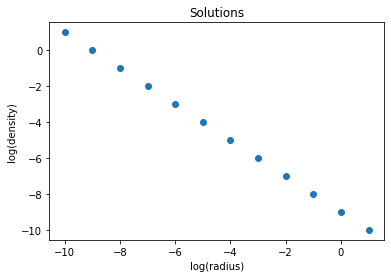

In [12]:
indices = [137, 11, 25, 39, 53, 67, 81, 95, 109, 123, 151, 165]
min_densities = []
min_radii = []
min_chi2 = []

for i in range(len(indices)):
    x = indices[i]
    min_densities.append(densities[x])
    min_radii.append(max_radii[x])
    min_chi2.append(chi2_vals[x])

fig1 = plt.figure()

plt.scatter(np.log10(min_radii), np.log10(min_densities))#,vmin=0.1,vmax=.3) #, label='Exact') 
#plt.scatter(Adeg, Bdeg, 20 ,c=1000*(EW10-EWval))#,vmin=0.1,vmax=.3) #, label='Exact') 
#plt.colorbar(label="Equivalent Width (angstroms)")
#plt.plot(RAlist,DEClist,'rd', label='Approximation')
#plt.legend()
# plt.xlim([-11,5])
# plt.ylim([13,28])

plt.title('Solutions')
plt.xlabel('log(radius)')
plt.ylabel('log(density)')

# linear regression to solutions of radius and density combos (with seeded impact parameter)

poly1d([-1., -9.])

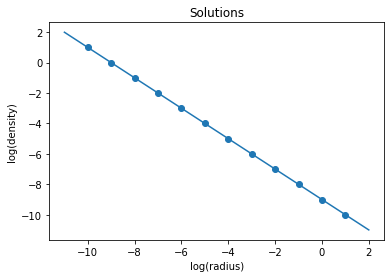

In [96]:
dummyset = []
t=-11

while t<2:
    dummyset.append(t)
    t+=0.001

fit=np.poly1d(np.polyfit(np.log10(min_radii),np.log10(min_densities),1))
#continuum = fit(velocity) #inputs all x-values into the polynomial fit to produce some y-values
linearfit = fit(dummyset)

fig1 = plt.figure()

plt.scatter(np.log10(min_radii), np.log10(min_densities))#,vmin=0.1,vmax=.3) #, label='Exact') 
plt.plot(dummyset, linearfit)
#plt.scatter(Adeg, Bdeg, 20 ,c=1000*(EW10-EWval))#,vmin=0.1,vmax=.3) #, label='Exact') 
#plt.colorbar(label="Equivalent Width (angstroms)")
#plt.plot(RAlist,DEClist,'rd', label='Approximation')
#plt.legend()
# plt.xlim([-11,5])
# plt.ylim([13,28])

plt.title('Solutions')
plt.xlabel('log(radius)')
plt.ylabel('log(density)')

fit

# creating chi2_random_table (random impact parameters)

In [88]:
#nested loop to find the minimum chi^2 value with RANDOM impact parameters

from astropy.table import Table
from astropy.io import fits
import numpy as np

import modules as m
import pickle

from importlib import reload
reload(m)

tab=fits.open('SCIENCE_RBNSPECTRA.fits');
info= tab[1].data
ra=info['RA']
dec=info['DEC']
names=info['object']

chi2_random_table=Table()

chi2_random_table['density']=0*np.zeros(225)
chi2_random_table['maxradius']=0*np.zeros(225)
chi2_random_table['chi2']=0*np.zeros(225)

chi2_random_table.write('chi2_random_table.txt',format='ascii',overwrite=True)

x=-10
chi2list = []
index = 0

for i in range(15):
    
    y=-10
    densitylist = []
    for i in range(15):
        densitylist.append(1*10**y)
        y+=1
        chi2list.append(m.chi2random(densitylist[i], 1*10**x))
        
        chi2_random_table['density'][index]=densitylist[i]
        chi2_random_table['maxradius'][index]=1*10**x
        chi2_random_table['chi2'][index]=m.chi2random(densitylist[i], 1*10**x)
        chi2_random_table.write('chi2_random_table.txt',format='ascii',overwrite=True)
        
        index+=1

    x+=1

# print(chi2list)





# for i in range(15):
    
#     y=-10
#     densitylist = []
#     for i in range(15):
#         densitylist.append(1*10**y)
#         y+=1
    
#     chi2list.append(m.chi2(density[i], 1*10**x))
#     x+=1

In [90]:
from astropy.table import Table
T=Table.read('chi2_random_table.txt',format='ascii')
T.show_in_browser(jsviewer=True)

# comparing chi^2 with varying densities (constant radius) (random impact parameters)

Text(0, 0.5, 'log(chi2)')

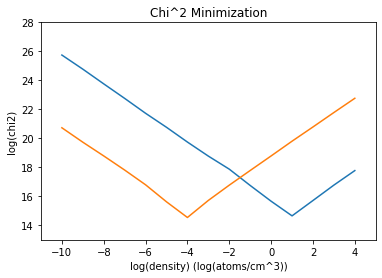

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
#provides access to fits (flexible image transport system) files
from matplotlib.pyplot import cm 
from astropy.wcs import WCS
from astropy.table import Table
#transformation from the real position of an object on the celestial sphere to the position on a cartesian plane
%matplotlib inline

path = "/Users/PallaviMaladkar/Documents/Research/Flames_M83/"
chi2_random_table = Table.read(path+'chi2_random_table.txt',format='ascii')

densities = chi2_random_table['density']
max_radii = chi2_random_table['maxradius']
chi2_vals = chi2_random_table['chi2']

densityneg10 = []
chi2neg10 = []
densityneg5 = []
chi2neg5 = []

for i in range(len(densities)):
    if max_radii[i] == 1*10**-10:
        densityneg10.append(densities[i])
        chi2neg10.append(chi2_vals[i])
    if max_radii[i] == 1*10**-5:
        densityneg5.append(densities[i])
        chi2neg5.append(chi2_vals[i])
    power+=1

fig1 = plt.figure()

plt.plot(np.log10(densityneg10), np.log10(chi2neg10))#,vmin=0.1,vmax=.3) #, label='Exact') 
plt.plot(np.log10(densityneg5), np.log10(chi2neg5))
#plt.scatter(Adeg, Bdeg, 20 ,c=1000*(EW10-EWval))#,vmin=0.1,vmax=.3) #, label='Exact') 
#plt.colorbar(label="Equivalent Width (angstroms)")
#plt.plot(RAlist,DEClist,'rd', label='Approximation')
#plt.legend()
plt.xlim([-11,5])
plt.ylim([13,28])

plt.title('Chi^2 Minimization')
plt.xlabel('log(density) (log(atoms/cm^3))')
plt.ylabel('log(chi2)')

In [113]:
from astropy.table import Table
from astropy.io import fits
import numpy as np

import modules as m
import pickle

from importlib import reload
reload(m)

tab=fits.open('SCIENCE_RBNSPECTRA.fits');
info= tab[1].data
ra=info['RA']
dec=info['DEC']
names=info['object']

chi2_range2_table=Table()

chi2_range2_table['density']=0*np.zeros(10000)
chi2_range2_table['maxradius']=0*np.zeros(10000)
chi2_range2_table['chi2']=0*np.zeros(10000)

chi2_range2_table.write('chi2_range2_table.txt',format='ascii',overwrite=True)

x=0
chi2list = []
index = 0

while x<0.1:
    y=0
    densitylist = []
    radius = x
    for i in range(100):
        densitylist.append(y)
        y+=1e-8
        chi2list.append(m.chi2(densitylist[i],radius))
        
        chi2_range2_table['density'][index]=densitylist[i]
        chi2_range2_table['maxradius'][index]=radius
        chi2_range2_table['chi2'][index]=m.chi2(densitylist[i], radius)
        chi2_range2_table.write('chi2_r1_d6.txt',format='ascii',overwrite=True)
    
        index+=1
        
    x+=0.001

print('done')

done


In [115]:
from astropy.table import Table
T=Table.read('chi2_r1_d6.txt',format='ascii')
T.show_in_browser(jsviewer=True)

/Users/PallaviMaladkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10
/Users/PallaviMaladkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log10
/Users/PallaviMaladkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10


Text(0, 0.5, 'log(chi2)')

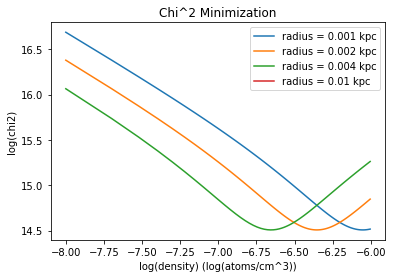

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
#provides access to fits (flexible image transport system) files
from matplotlib.pyplot import cm 
from astropy.wcs import WCS
from astropy.table import Table
#transformation from the real position of an object on the celestial sphere to the position on a cartesian plane
%matplotlib inline

path = "/Users/PallaviMaladkar/Documents/Research/Flames_M83/"
table = Table.read(path+'chi2_r1_d6.txt',format='ascii')

densities = table['density']
max_radii = table['maxradius']
chi2_vals = table['chi2']

density_001 = []
chi2_001 = []
density_002 = []
chi2_002 = []
density_004 = []
chi2_004 = []
density_01 = []
chi2_01 = []

for i in range(len(densities)):
    if max_radii[i] == 0.001:
        density_001.append(densities[i])
        chi2_001.append(chi2_vals[i])
    if max_radii[i] == 0.002:
        density_002.append(densities[i])
        chi2_002.append(chi2_vals[i])
    if max_radii[i] == 0.004:
        density_004.append(densities[i])
        chi2_004.append(chi2_vals[i])
    if max_radii[i] == 0.01:
        density_01.append(densities[i])
        chi2_01.append(chi2_vals[i])
    #power+=1

fig1 = plt.figure()

plt.plot(np.log10(density_001), np.log10(chi2_001), label = 'radius = 0.001 kpc')#,vmin=0.1,vmax=.3) #, label='Exact') 
plt.plot(np.log10(density_002), np.log10(chi2_002), label = 'radius = 0.002 kpc')
plt.plot(np.log10(density_004), np.log10(chi2_004), label = 'radius = 0.004 kpc')
plt.plot(np.log10(density_01), np.log10(chi2_01), label = 'radius = 0.01 kpc')
#plt.scatter(Adeg, Bdeg, 20 ,c=1000*(EW10-EWval))#,vmin=0.1,vmax=.3) #, label='Exact') 
#plt.colorbar(label="Equivalent Width (angstroms)")
#plt.plot(RAlist,DEClist,'rd', label='Approximation')
plt.legend()
# plt.xlim([-11,5])
# plt.ylim([13,28])

plt.title('Chi^2 Minimization')
plt.xlabel('log(density) (log(atoms/cm^3))')
plt.ylabel('log(chi2)')

In [122]:
from astropy.table import Table
from astropy.io import fits
import numpy as np

import modules as m
import pickle

from importlib import reload
reload(m)

tab=fits.open('SCIENCE_RBNSPECTRA.fits');
info= tab[1].data
ra=info['RA']
dec=info['DEC']
names=info['object']

chi2_range2_table=Table()

chi2_range2_table['density']=0*np.zeros(10000)
chi2_range2_table['maxradius']=0*np.zeros(10000)
chi2_range2_table['chi2']=0*np.zeros(10000)

chi2_range2_table.write('chi2_range2random_table.txt',format='ascii',overwrite=True)

x=0
chi2list = []
index = 0

while x<0.1:
    y=0
    densitylist = []
    radius = x
    for i in range(100):
        densitylist.append(y)
        y+=1e-8
        chi2list.append(m.chi2random(densitylist[i],radius))
        
        chi2_range2_table['density'][index]=densitylist[i]
        chi2_range2_table['maxradius'][index]=radius
        chi2_range2_table['chi2'][index]=m.chi2random(densitylist[i], radius)
        chi2_range2_table.write('chi2_range2random_table.txt',format='ascii',overwrite=True)
    
        index+=1
        
    x+=0.001

print('done')

done


/Users/PallaviMaladkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10
/Users/PallaviMaladkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log10
/Users/PallaviMaladkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10


Text(0, 0.5, 'log(chi2)')

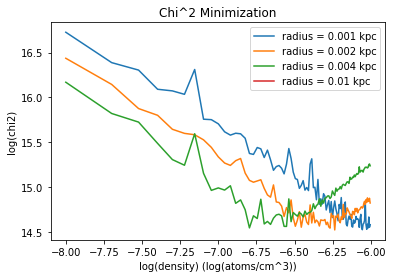

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
#provides access to fits (flexible image transport system) files
from matplotlib.pyplot import cm 
from astropy.wcs import WCS
from astropy.table import Table
#transformation from the real position of an object on the celestial sphere to the position on a cartesian plane
%matplotlib inline

path = "/Users/PallaviMaladkar/Documents/Research/Flames_M83/"
table = Table.read(path+'chi2_range2random_table.txt',format='ascii')

densities = table['density']
max_radii = table['maxradius']
chi2_vals = table['chi2']

density_001 = []
chi2_001 = []
density_002 = []
chi2_002 = []
density_004 = []
chi2_004 = []
density_01 = []
chi2_01 = []

for i in range(len(densities)):
    if max_radii[i] == 0.001:
        density_001.append(densities[i])
        chi2_001.append(chi2_vals[i])
    if max_radii[i] == 0.002:
        density_002.append(densities[i])
        chi2_002.append(chi2_vals[i])
    if max_radii[i] == 0.004:
        density_004.append(densities[i])
        chi2_004.append(chi2_vals[i])
    if max_radii[i] == 0.01:
        density_01.append(densities[i])
        chi2_01.append(chi2_vals[i])
    #power+=1

fig1 = plt.figure()

plt.plot(np.log10(density_001), np.log10(chi2_001), label = 'radius = 0.001 kpc')#,vmin=0.1,vmax=.3) #, label='Exact') 
plt.plot(np.log10(density_002), np.log10(chi2_002), label = 'radius = 0.002 kpc')
plt.plot(np.log10(density_004), np.log10(chi2_004), label = 'radius = 0.004 kpc')
plt.plot(np.log10(density_01), np.log10(chi2_01), label = 'radius = 0.01 kpc')
#plt.scatter(Adeg, Bdeg, 20 ,c=1000*(EW10-EWval))#,vmin=0.1,vmax=.3) #, label='Exact') 
#plt.colorbar(label="Equivalent Width (angstroms)")
#plt.plot(RAlist,DEClist,'rd', label='Approximation')
plt.legend()
# plt.xlim([-11,5])
# plt.ylim([13,28])

plt.title('Chi^2 Minimization')
plt.xlabel('log(density) (log(atoms/cm^3))')
plt.ylabel('log(chi2)')

In [123]:
from astropy.table import Table
T=Table.read('chi2_range2random_table.txt',format='ascii')
T.show_in_browser(jsviewer=True)

In [147]:
from astropy.table import Table
from astropy.io import fits
import numpy as np

import modules as m
import pickle

from importlib import reload
reload(m)

tab=fits.open('SCIENCE_RBNSPECTRA.fits');
info= tab[1].data
ra=info['RA']
dec=info['DEC']
names=info['object']

chi2_table=Table()

chi2_table['density']=0*np.zeros(10000)
chi2_table['maxradius']=0*np.zeros(10000)
chi2_table['chi2']=0*np.zeros(10000)
chi2_table['reducedchi2']=0*np.zeros(10000)

chi2_table.write('chi2_table_standev.txt',format='ascii',overwrite=True)

x=0
chi2list = []
index = 0

while x<0.1:
    y=0
    densitylist = []
    radius = x
    for i in range(100):
        densitylist.append(y)
        y+=1e-8
        chi2list.append(m.reducedchi2(densitylist[i],radius))
        
        chi2_table['density'][index]=densitylist[i]
        chi2_table['maxradius'][index]=radius
        chi2_table['chi2'][index]=m.reducedchi2(densitylist[i], radius)
        chi2_table['reducedchi2'][index]=m.reducedchi2(densitylist[i], radius)/126
        chi2_table.write('chi2_table_standev.txt',format='ascii',overwrite=True)
    
        index+=1
        
    x+=0.001

print('done')

done


In [7]:
from astropy.table import Table
T=Table.read('chi2_table_standev.txt',format='ascii')
T.show_in_browser(jsviewer=True)

/Users/PallaviMaladkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in log10
/Users/PallaviMaladkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log10
/Users/PallaviMaladkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log10


Text(0, 0.5, 'log(reduced chi2)')

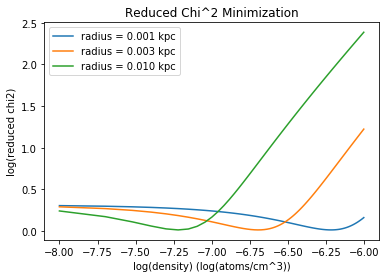

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
#provides access to fits (flexible image transport system) files
from matplotlib.pyplot import cm 
from astropy.wcs import WCS
from astropy.table import Table
#transformation from the real position of an object on the celestial sphere to the position on a cartesian plane
%matplotlib inline

path = "/Users/PallaviMaladkar/Documents/Research/Flames_M83/"
table = Table.read(path+'chi2_table_standev.txt',format='ascii')

densities = table['density']
max_radii = table['maxradius']
chi2_vals = table['chi2']
reducedchi2_vals = table['reducedchi2']

density_001 = []
chi2_001 = []
reducedchi2_001 = []
density_002 = []
chi2_002 = []
reducedchi2_002 = []
density_003 = []
chi2_003 = []
reducedchi2_003 = []
density_004 = []
chi2_004 = []
reducedchi2_004 = []

for i in range(len(densities)):
    if max_radii[i] == 0.003:
        density_001.append(densities[i])
        chi2_001.append(chi2_vals[i])
        reducedchi2_001.append(reducedchi2_vals[i])
#     if max_radii[i] == 0.004:
#         density_002.append(densities[i])
#         chi2_002.append(chi2_vals[i])
#         reducedchi2_002.append(reducedchi2_vals[i])
    if max_radii[i] == 0.001:
        density_003.append(densities[i])
        chi2_003.append(chi2_vals[i])
        reducedchi2_003.append(reducedchi2_vals[i])
    if max_radii[i] == 0.010000000000000002:
        density_004.append(densities[i])
        chi2_004.append(chi2_vals[i])
        reducedchi2_004.append(reducedchi2_vals[i])
    #power+=1

fig1 = plt.figure()

plt.plot(np.log10(density_003), np.log10(reducedchi2_003), label = 'radius = 0.001 kpc')
plt.plot(np.log10(density_001), np.log10(reducedchi2_001), label = 'radius = 0.003 kpc')#,vmin=0.1,vmax=.3) #, label='Exact') 
# plt.plot(np.log10(density_002), np.log10(reducedchi2_002), label = 'radius = 0.004 kpc')
plt.plot(np.log10(density_004), np.log10(reducedchi2_004), label = 'radius = 0.010 kpc')
#plt.scatter(Adeg, Bdeg, 20 ,c=1000*(EW10-EWval))#,vmin=0.1,vmax=.3) #, label='Exact') 
#plt.colorbar(label="Equivalent Width (angstroms)")
#plt.plot(RAlist,DEClist,'rd', label='Approximation')
plt.legend()
# plt.xlim([-11,5])
# plt.ylim([13,28])

plt.title('Reduced Chi^2 Minimization')
plt.xlabel('log(density) (log(atoms/cm^3))')
plt.ylabel('log(reduced chi2)')

In [10]:
r = 0.003 #kpc
r_meters = r*3.086e19 #m
d = 2e-7 #atoms/cm^3
atomic_mass = 40.078 #g/mol
d_kgm3 = d*atomic_mass/(6.02e23)/1000*(100**3) #kg/m^3
volume = (4/3)*np.pi*r_meters**3
mass = volume*d_kgm3
mass*126

5.576352627512138e+27

In [151]:
from astropy.table import Table
from astropy.io import fits
import numpy as np

import modules as m
import pickle

from importlib import reload
reload(m)

tab=fits.open('SCIENCE_RBNSPECTRA.fits');
info= tab[1].data
ra=info['RA']
dec=info['DEC']
names=info['object']

chi2_table=Table()

chi2_table['density']=0*np.zeros(10000)
chi2_table['maxradius']=0*np.zeros(10000)
chi2_table['chi2']=0*np.zeros(10000)
chi2_table['reducedchi2']=0*np.zeros(10000)

chi2_table.write('chi2_table_rand_standev.txt',format='ascii',overwrite=True)

x=0
chi2list = []
index = 0

while x<0.1:
    y=0
    densitylist = []
    radius = x
    for i in range(100):
        densitylist.append(y)
        y+=1e-8
        chi2list.append(m.reducedchi2random(densitylist[i],radius))
        
        chi2_table['density'][index]=densitylist[i]
        chi2_table['maxradius'][index]=radius
        chi2_table['chi2'][index]=m.reducedchi2random(densitylist[i], radius)
        chi2_table['reducedchi2'][index]=m.reducedchi2random(densitylist[i], radius)/126
        chi2_table.write('chi2_table_rand_standev.txt',format='ascii',overwrite=True)
    
        index+=1
        
    x+=0.001

print('done')

# from astropy.table import Table
# from astropy.io import fits
# import numpy as np

# import modules as m
# import pickle

# from importlib import reload
# reload(m)

# tab=fits.open('SCIENCE_RBNSPECTRA.fits');
# info= tab[1].data
# ra=info['RA']
# dec=info['DEC']
# names=info['object']

# chi2_table=Table()

# chi2_table['density']=0*np.zeros(10000)
# chi2_table['maxradius']=0*np.zeros(10000)
# chi2_table['chi2']=0*np.zeros(10000)

# chi2_table.write('chi2_table_rand_standev.txt',format='ascii',overwrite=True)

# x=0
# chi2list = []
# index = 0

# while x<0.1:
#     y=0
#     densitylist = []
#     radius = x
#     for i in range(100):
#         densitylist.append(y)
#         y+=1e-8
#         chi2list.append(m.reducedchi2random(densitylist[i],radius))
        
#         chi2_table['density'][index]=densitylist[i]
#         chi2_table['maxradius'][index]=radius
#         chi2_table['chi2'][index]=m.reducedchi2random(densitylist[i], radius)
#         chi2_table.write('chi2_table_rand_standev.txt',format='ascii',overwrite=True)
    
#         index+=1
        
#     x+=0.001

# print('done')

done


In [152]:
from astropy.table import Table
T=Table.read('chi2_table_rand_standev.txt',format='ascii')
T.show_in_browser(jsviewer=True)

/Users/PallaviMaladkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in log10
/Users/PallaviMaladkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log10
/Users/PallaviMaladkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in log10
/Users/PallaviMaladkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in log10


Text(0, 0.5, 'log(reduced chi2)')

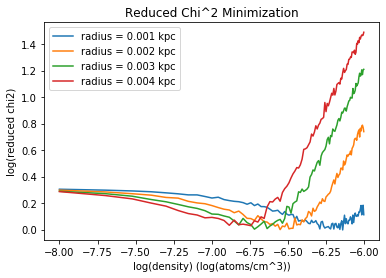

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
#provides access to fits (flexible image transport system) files
from matplotlib.pyplot import cm 
from astropy.wcs import WCS
from astropy.table import Table
#transformation from the real position of an object on the celestial sphere to the position on a cartesian plane
%matplotlib inline

path = "/Users/PallaviMaladkar/Documents/Research/Flames_M83/"
table = Table.read(path+'chi2_table_rand_standev.txt',format='ascii')

densities = table['density']
max_radii = table['maxradius']
chi2_vals = table['chi2']
reducedchi2_vals = table['reducedchi2']

density_001 = []
chi2_001 = []
reducedchi2_001 = []
density_002 = []
chi2_002 = []
reducedchi2_002 = []
density_003 = []
chi2_003 = []
reducedchi2_003 = []
density_004 = []
chi2_004 = []
reducedchi2_004 = []

for i in range(len(densities)):
    if max_radii[i] == 0.001:
        density_001.append(densities[i])
        chi2_001.append(chi2_vals[i])
        reducedchi2_001.append(reducedchi2_vals[i])
    if max_radii[i] == 0.002:
        density_002.append(densities[i])
        chi2_002.append(chi2_vals[i])
        reducedchi2_002.append(reducedchi2_vals[i])
    if max_radii[i] == 0.003:
        density_003.append(densities[i])
        chi2_003.append(chi2_vals[i])
        reducedchi2_003.append(reducedchi2_vals[i])
    if max_radii[i] == 0.004:
        density_004.append(densities[i])
        chi2_004.append(chi2_vals[i])
        reducedchi2_004.append(reducedchi2_vals[i])
    #power+=1

fig1 = plt.figure()

plt.plot(np.log10(density_001), np.log10(reducedchi2_001), label = 'radius = 0.001 kpc')#,vmin=0.1,vmax=.3) #, label='Exact') 
plt.plot(np.log10(density_002), np.log10(reducedchi2_002), label = 'radius = 0.002 kpc')
plt.plot(np.log10(density_003), np.log10(reducedchi2_003), label = 'radius = 0.003 kpc')
plt.plot(np.log10(density_004), np.log10(reducedchi2_004), label = 'radius = 0.004 kpc')
#plt.scatter(Adeg, Bdeg, 20 ,c=1000*(EW10-EWval))#,vmin=0.1,vmax=.3) #, label='Exact') 
#plt.colorbar(label="Equivalent Width (angstroms)")
#plt.plot(RAlist,DEClist,'rd', label='Approximation')
plt.legend()
# plt.xlim([-11,5])
# plt.ylim([13,28])

plt.title('Reduced Chi^2 Minimization')
plt.xlabel('log(density) (log(atoms/cm^3))')
plt.ylabel('log(reduced chi2)')

# import numpy as np
# import matplotlib.pyplot as plt
# from astropy.io import fits
# #provides access to fits (flexible image transport system) files
# from matplotlib.pyplot import cm 
# from astropy.wcs import WCS
# from astropy.table import Table
# #transformation from the real position of an object on the celestial sphere to the position on a cartesian plane
# %matplotlib inline

# path = "/Users/PallaviMaladkar/Documents/Research/Flames_M83/"
# table = Table.read(path+'chi2_table_rand_standev.txt',format='ascii')

# densities = table['density']
# max_radii = table['maxradius']
# chi2_vals = table['chi2']

# density_001 = []
# chi2_001 = []
# density_002 = []
# chi2_002 = []
# density_004 = []
# chi2_004 = []
# density_01 = []
# chi2_01 = []

# for i in range(len(densities)):
#     if max_radii[i] == 0.001:
#         density_001.append(densities[i])
#         chi2_001.append(chi2_vals[i])
#     if max_radii[i] == 0.002:
#         density_002.append(densities[i])
#         chi2_002.append(chi2_vals[i])
#     if max_radii[i] == 0.003:
#         density_004.append(densities[i])
#         chi2_004.append(chi2_vals[i])
#     if max_radii[i] == 0.004:
#         density_01.append(densities[i])
#         chi2_01.append(chi2_vals[i])
#     power+=1

# fig1 = plt.figure()

# plt.plot(np.log10(density_001), np.log10(chi2_001), label = 'radius = 0.001 kpc')#,vmin=0.1,vmax=.3) #, label='Exact') 
# plt.plot(np.log10(density_002), np.log10(chi2_002), label = 'radius = 0.002 kpc')
# plt.plot(np.log10(density_004), np.log10(chi2_004), label = 'radius = 0.003 kpc')
# plt.plot(np.log10(density_01), np.log10(chi2_01), label = 'radius = 0.004 kpc')
# #plt.scatter(Adeg, Bdeg, 20 ,c=1000*(EW10-EWval))#,vmin=0.1,vmax=.3) #, label='Exact') 
# #plt.colorbar(label="Equivalent Width (angstroms)")
# #plt.plot(RAlist,DEClist,'rd', label='Approximation')
# plt.legend()
# # plt.xlim([-11,5])
# # plt.ylim([13,28])

# plt.title('Reduced Chi^2 Minimization')
# plt.xlabel('log(density) (log(atoms/cm^3))')
# plt.ylabel('log(chi2)')

In [155]:
from astropy.table import Table
from astropy.io import fits
import numpy as np

import modules as m
import pickle

from importlib import reload
reload(m)

tab=fits.open('SCIENCE_RBNSPECTRA.fits');
info= tab[1].data
ra=info['RA']
dec=info['DEC']
names=info['object']

chi2_table=Table()

chi2_table['density']=0*np.zeros(1000)
chi2_table['maxradius']=0*np.zeros(1000)
chi2_table['chi2']=0*np.zeros(1000)
chi2_table['reducedchi2']=0*np.zeros(1000)

chi2_table.write('chi2_lowerrange.txt',format='ascii',overwrite=True)

x=0
chi2list = []
index = 0

while x<0.001:
    y=0
    densitylist = []
    radius = x
    for i in range(100):
        densitylist.append(y)
        y+=1e-9
        chi2list.append(m.reducedchi2random(densitylist[i],radius))
        
        chi2_table['density'][index]=densitylist[i]
        chi2_table['maxradius'][index]=radius
        chi2_table['chi2'][index]=m.reducedchi2random(densitylist[i], radius)
        chi2_table['reducedchi2'][index]=m.reducedchi2random(densitylist[i], radius)/126
        chi2_table.write('chi2_lowerrange.txt',format='ascii',overwrite=True)
    
        index+=1
        
    x+=0.0001

print('done')

# from astropy.table import Table
# from astropy.io import fits
# import numpy as np

# import modules as m
# import pickle

# from importlib import reload
# reload(m)

# tab=fits.open('SCIENCE_RBNSPECTRA.fits');
# info= tab[1].data
# ra=info['RA']
# dec=info['DEC']
# names=info['object']

# chi2_table=Table()

# chi2_table['density']=0*np.zeros(1000)
# chi2_table['maxradius']=0*np.zeros(1000)
# chi2_table['chi2']=0*np.zeros(1000)

# chi2_table.write('chi2_lowerrange.txt',format='ascii',overwrite=True)

# x=0
# chi2list = []
# index = 0

# while x<0.001:
#     y=0
#     densitylist = []
#     radius = x
#     for i in range(100):
#         densitylist.append(y)
#         y+=1e-9
#         chi2list.append(m.reducedchi2random(densitylist[i],radius))
        
#         chi2_table['density'][index]=densitylist[i]
#         chi2_table['maxradius'][index]=radius
#         chi2_table['chi2'][index]=m.reducedchi2random(densitylist[i], radius)
#         chi2_table.write('chi2_lowerrange.txt',format='ascii',overwrite=True)
    
#         index+=1
        
#     x+=0.0001

# print('done')

done


In [156]:
from astropy.table import Table
T=Table.read('chi2_lowerrange.txt',format='ascii')
T.show_in_browser(jsviewer=True)

/Users/PallaviMaladkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in log10
/Users/PallaviMaladkar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log10


Text(0, 0.5, 'log(reduced chi2)')

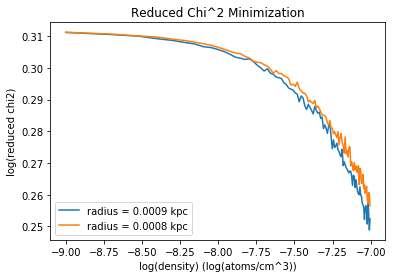

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
#provides access to fits (flexible image transport system) files
from matplotlib.pyplot import cm 
from astropy.wcs import WCS
from astropy.table import Table
#transformation from the real position of an object on the celestial sphere to the position on a cartesian plane
%matplotlib inline

path = "/Users/PallaviMaladkar/Documents/Research/Flames_M83/"
table = Table.read(path+'chi2_lowerrange.txt',format='ascii')

densities = table['density']
max_radii = table['maxradius']
chi2_vals = table['chi2']
reducedchi2_vals = table['reducedchi2']

density_001 = []
chi2_001 = []
reducedchi2_001 = []
density_002 = []
chi2_002 = []
reducedchi2_002 = []
density_003 = []
chi2_003 = []
reducedchi2_003 = []
density_004 = []
chi2_004 = []
reducedchi2_004 = []

for i in range(len(densities)):
    if max_radii[i] == 0.0009000000000000002:
        density_001.append(densities[i])
        chi2_001.append(chi2_vals[i])
        reducedchi2_001.append(reducedchi2_vals[i])
    if max_radii[i] == 0.0008000000000000001:
        density_002.append(densities[i])
        chi2_002.append(chi2_vals[i])
        reducedchi2_002.append(reducedchi2_vals[i])
#     if max_radii[i] == 0.003:
#         density_003.append(densities[i])
#         chi2_003.append(chi2_vals[i])
#         reducedchi2_003.append(reducedchi2_vals[i])
#     if max_radii[i] == 0.004:
#         density_004.append(densities[i])
#         chi2_004.append(chi2_vals[i])
#         reducedchi2_004.append(reducedchi2_vals[i])
    #power+=1

fig1 = plt.figure()

plt.plot(np.log10(density_001), np.log10(reducedchi2_001), label = 'radius = 0.0009 kpc')#,vmin=0.1,vmax=.3) #, label='Exact') 
plt.plot(np.log10(density_002), np.log10(reducedchi2_002), label = 'radius = 0.0008 kpc')
# plt.plot(np.log10(density_003), np.log10(reducedchi2_003), label = 'radius = 0.003 kpc')
# plt.plot(np.log10(density_004), np.log10(reducedchi2_004), label = 'radius = 0.004 kpc')
#plt.scatter(Adeg, Bdeg, 20 ,c=1000*(EW10-EWval))#,vmin=0.1,vmax=.3) #, label='Exact') 
#plt.colorbar(label="Equivalent Width (angstroms)")
#plt.plot(RAlist,DEClist,'rd', label='Approximation')
plt.legend()
# plt.xlim([-11,5])
# plt.ylim([13,28])

plt.title('Reduced Chi^2 Minimization')
plt.xlabel('log(density) (log(atoms/cm^3))')
plt.ylabel('log(reduced chi2)')

In [15]:
V = (4/3)*np.pi*(0.003*3.086e19)**3 #m^3
d = 2e-7*100**3/6.0221e23*40.08/1000 #kg/m^3
m = V * d
print(m)
print(m*69)

4.424354162313492e+25
3.0528043719963095e+27
